###1. What is hypothesis testing in statistics?

-> Hypothesis testing in statistics is a process used to decide whether there is enough evidence in a sample to support a specific claim about a population. It involves stating a null hypothesis (no effect) and an alternative hypothesis (effect present), then using sample data to accept or reject the null hypothesis based on a significance level.

###2. What is the null hypothesis, and how does it differ from the alternative hypothesis?

-> The null hypothesis (H₀) is a statement that there is no effect or no difference, representing the default or status quo. The alternative hypothesis (H₁ or Ha) is what you want to test for—it suggests that there is an effect or a difference. In hypothesis testing, you either reject the null hypothesis in favor of the alternative or fail to reject it.

###3. Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.

-> The significance level (denoted as α) is a threshold set by the researcher, usually 0.05 (5%), that defines the maximum probability of rejecting the null hypothesis when it is actually true (a Type I error).

Role in hypothesis testing:

If the p-value (probability of observed data under the null hypothesis) is less than or equal to α, you reject the null hypothesis—meaning the results are statistically significant.

If the p-value is greater than α, you fail to reject the null hypothesis.


So, the significance level controls how strong the evidence must be to conclude that the effect or difference is real.

###4. What are Type I and Type II errors? Give examples of each.

-> Type I Error:

Rejecting the null hypothesis when it is actually true (a false positive).

Example: Saying a new drug works when it actually doesn’t.

* Type II Error:

Failing to reject the null hypothesis when the alternative is true (a false negative).

Example: Saying a new drug doesn’t work when it actually does.

###5. What is the difference between a Z-test and a T-test? Explain when to use each.

-> Z-test: Used when the population standard deviation is known and the sample size is large (usually n > 30). It assumes the data is normally distributed.

T-test: Used when the population standard deviation is unknown and the sample size is small (usually n < 30). It accounts for extra uncertainty using the t-distribution.


When to use:

Use Z-test for large samples with known population variance.

Use T-test for small samples or when population variance is unknown.

###6. Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.

Hint: Generate random number using random function.

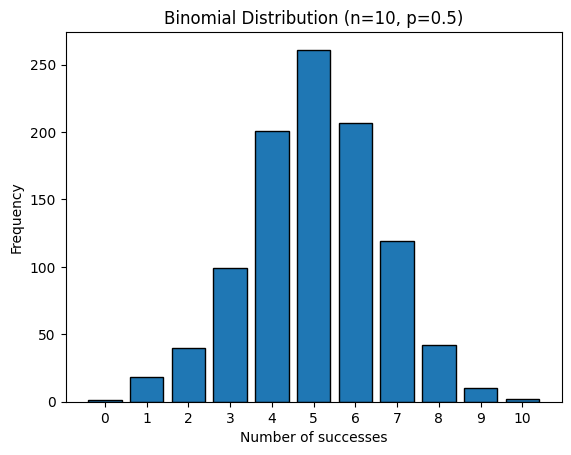

In [2]:
import random
import matplotlib.pyplot as plt

n = 10      # number of trials
p = 0.5     # probability of success
size = 1000 # number of samples

def binomial_trial(n, p):
    successes = 0
    for _ in range(n):
        if random.random() < p:
            successes += 1
    return successes

# Generate data
data = [binomial_trial(n, p) for _ in range(size)]

# Plot histogram
plt.hist(data, bins=range(n+2), align='left', edgecolor='black', rwidth=0.8)
plt.title('Binomial Distribution (n=10, p=0.5)')
plt.xlabel('Number of successes')
plt.ylabel('Frequency')
plt.xticks(range(n+1))
plt.show()

###7. Implement hypothesis testing using Z-statistics for a sample dataset in Python. Show the Python code and interpret the results.

sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
50.3, 50.4, 50.0, 49.7, 50.5, 49.9]



->Assuming the null hypothesis (H₀): population mean = 50, and population standard deviation  is known (let’s say , or we can specify our own). This will test if the sample mean differs significantly from 50.


In [6]:
import numpy as np
from scipy.stats import norm

# Sample data
data = [49.0,50.2,51.0,48.7,50.5,49.8,50.3,50.7,50.2,49.6,
        50.1,49.9,50.8,50.4,48.9,50.6,50.0,49.7,50.2,49.5,
        50.1,50.3,50.4,50.5,50.0,50.7,49.3,49.8,50.2,50.9,
        50.3,50.4,50.0,49.7,50.5,49.9]

# Known population mean and std deviation (assumed)
mu_0 = 50           # Hypothesized population mean
sigma = 0.7         # Assumed population standard deviation

# Sample statistics
x_bar = np.mean(data)
n = len(data)

# Calculate Z-statistic
z = (x_bar - mu_0) / (sigma / np.sqrt(n))

# Calculate two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z)))

print(f"Sample mean = {x_bar:.4f}")
print(f"Z statistic = {z:.4f}")
print(f"P-value = {p_value:.4f}")

# Interpret result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: sample mean is significantly different from 50.")
else:
    pass

Sample mean = 50.0861
Z statistic = 0.7381
P-value = 0.4605


###8. Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.


-> Here’s a Python script that:

Simulates data from a normal distribution,

Calculates the 95% confidence interval (CI) for the mean,

Plots the data points with matplotlib.



Sample mean = 48.74
95% Confidence Interval = [47.64, 49.84]


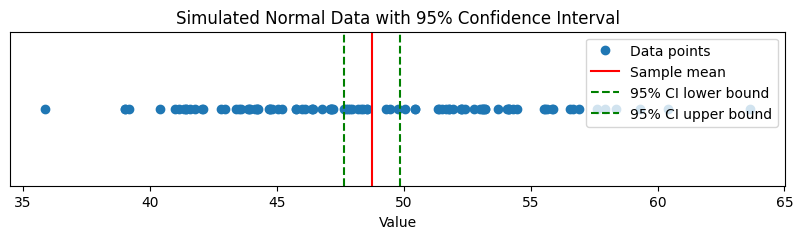

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters
mu = 50        # True mean
sigma = 5      # True standard deviation
n = 100        # Sample size

# Simulate data
data = np.random.normal(mu, sigma, n)

# Sample statistics
x_bar = np.mean(data)
s = np.std(data, ddof=1)  # Sample std dev
se = s / np.sqrt(n)       # Standard error

# 95% confidence interval (using t-distribution)
confidence = 0.95
df = n - 1
t_crit = stats.t.ppf((1 + confidence) / 2, df)
margin_error = t_crit * se
ci_lower = x_bar - margin_error
ci_upper = x_bar + margin_error

print(f"Sample mean = {x_bar:.2f}")
print(f"95% Confidence Interval = [{ci_lower:.2f}, {ci_upper:.2f}]")

# Plot data points
plt.figure(figsize=(10, 2))
plt.plot(data, np.zeros_like(data), 'o', label='Data points')
plt.axvline(x=x_bar, color='red', linestyle='-', label='Sample mean')
plt.axvline(x=ci_lower, color='green', linestyle='--', label='95% CI lower bound')
plt.axvline(x=ci_upper, color='green', linestyle='--', label='95% CI upper bound')
plt.yticks([])
plt.xlabel('Value')
plt.title('Simulated Normal Data with 95% Confidence Interval')
plt.legend()
plt.show()

###9. : Write a Python function to calculate the Z-scores from a dataset and visualize the standardized data using a histogram. Explain what the Z-scores represent in terms of standard deviations from the mean.

(Include your Python code and output in the code box below.)

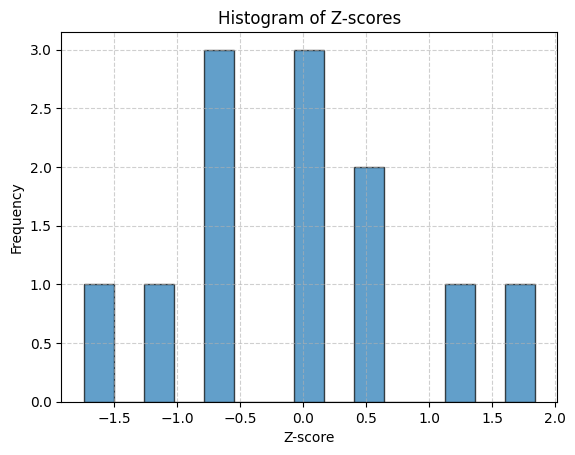

Mean of original data = 49.917
Standard deviation of original data = 1.676

Z-scores represent how many standard deviations each data point is from the mean.
For example, a z-score of 2 means the data point is 2 standard deviations above the mean.
A z-score of -1 means it is 1 standard deviation below the mean.


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_z_scores(data):
    # Calculate mean and std deviation
    mean = np.mean(data)
    std = np.std(data, ddof=1)  # sample std dev

    # Calculate z-scores
    z_scores = (data - mean) / std

    # Plot histogram
    plt.hist(z_scores, bins=15, edgecolor='black', alpha=0.7)
    plt.title('Histogram of Z-scores')
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Explanation
    print(f"Mean of original data = {mean:.3f}")
    print(f"Standard deviation of original data = {std:.3f}")
    print("\nZ-scores represent how many standard deviations each data point is from the mean.")
    print("For example, a z-score of 2 means the data point is 2 standard deviations above the mean.")
    print("A z-score of -1 means it is 1 standard deviation below the mean.")

# Example usage:
data = np.array([49, 50, 52, 47, 51, 49, 50, 53, 48, 50, 49, 51])
plot_z_scores(data)